In [20]:
import tensorflow as tf
import keras
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
N,M = x_train.shape[1:]

In [23]:
print(M," ",N)

28   28


In [24]:
x_train, x_test = x_train/255.0, x_test / 255.0


In [25]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(N,M)),
            tf.keras.layers.Dense(128,activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10,activation='softmax')
        ])


model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])

r=model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.9130 - val_loss: 0.1507 - val_accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9561 - val_loss: 0.1067 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9662 - val_loss: 0.0921 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.0864 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9763 - val_loss: 0.0810 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0750 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0765 - val_accuracy:

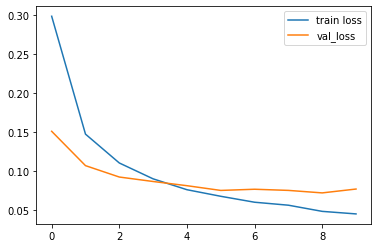

In [26]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

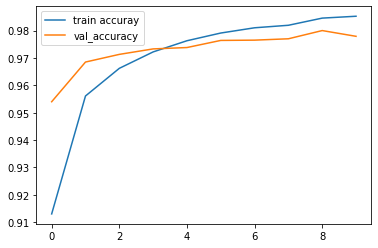

In [27]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [28]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9779
[0.07674481719732285, 0.9779000282287598]


Confusion matrix, without normalization
[[ 973    1    0    0    0    1    1    1    2    1]
 [   0 1122    4    1    0    1    1    2    4    0]
 [   8    4  997    3    1    0    2    6    9    2]
 [   1    0    3  991    0    3    0    4    0    8]
 [   0    0    4    0  942    0    4    1    2   29]
 [   2    0    0    4    1  881    1    0    1    2]
 [   4    2    0    1    4    4  939    0    4    0]
 [   1    3    9    1    0    0    0 1002    2   10]
 [   5    1    1    8    4    7    0    3  940    5]
 [   0    2    0    3    3    3    2    4    0  992]]


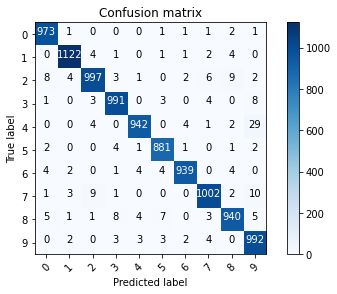

In [37]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))


Text(0.5, 1.0, 'True label: 2 Predicted 9')

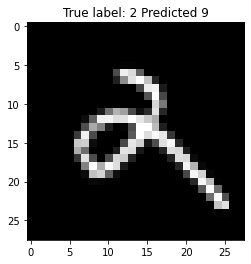

In [54]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i],p_test[i]))